<a href="https://colab.research.google.com/github/MuhammadTanveerm/House_Price_Predic_Using-_Machine_Learning/blob/main/House_price_predict_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:  Import Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

Step:2 Load Dataset

In [6]:
path_file = "/content/drive/MyDrive/Colab Notebooks/Projects ML/Housing.csv"
df = pd.read_csv(path_file)
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Step 3: Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

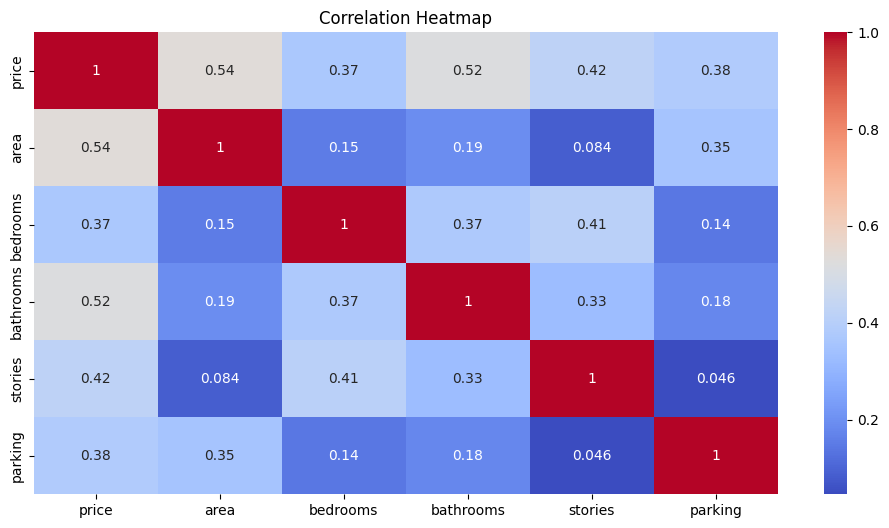

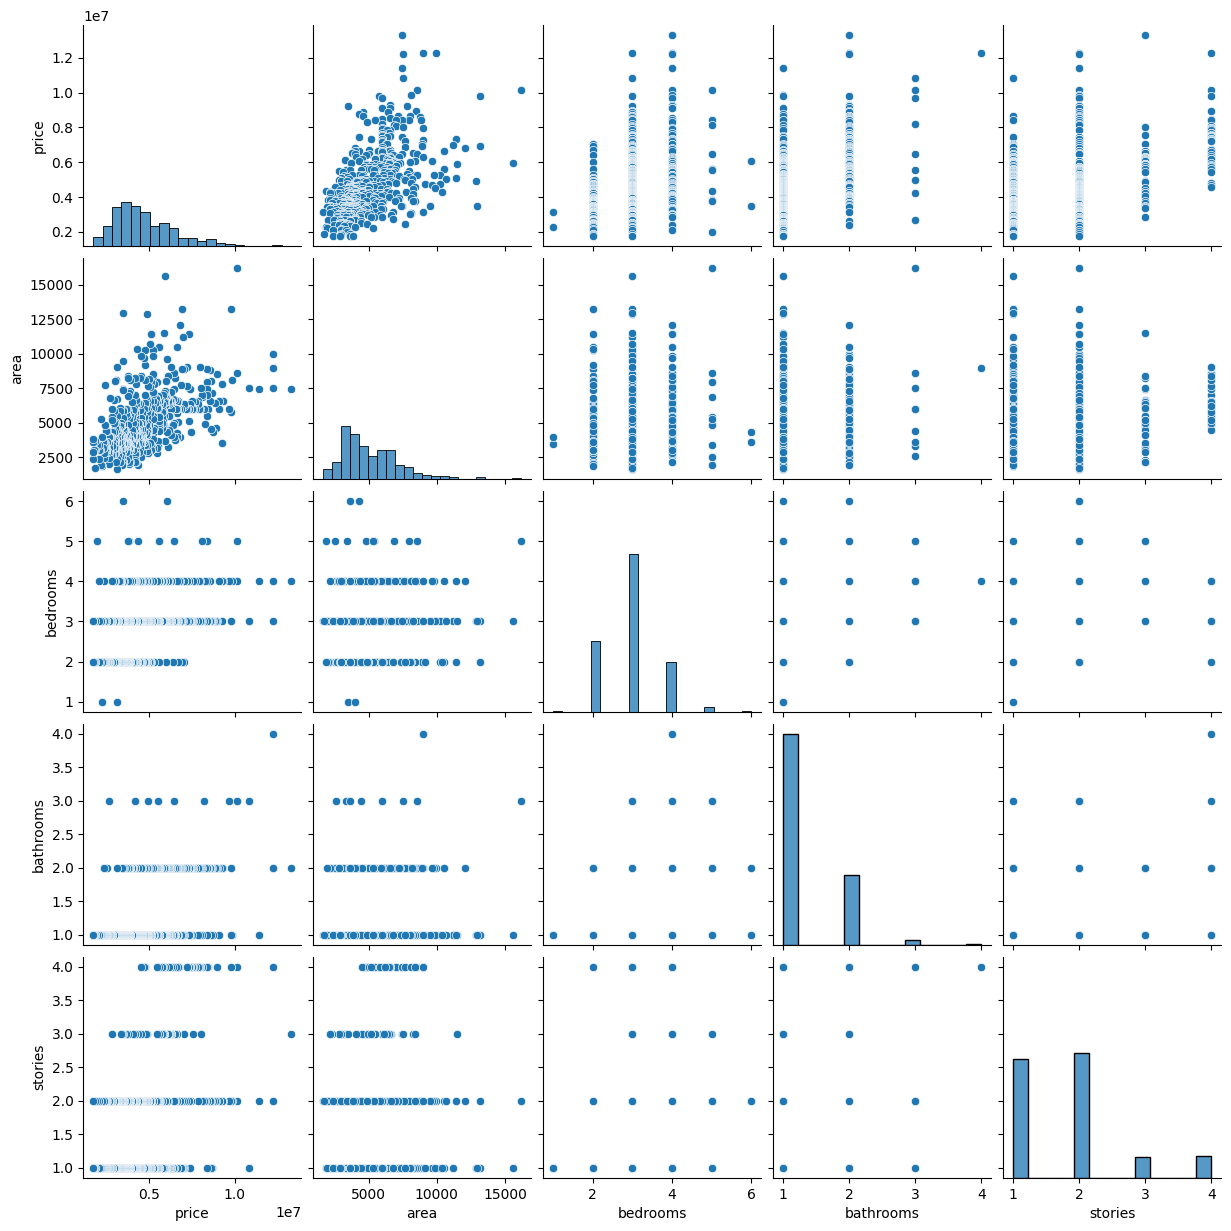

In [7]:
# Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for top features
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.show()

Step 4: Feature Preprocessing

In [8]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Step 5: Model Training

             *   Linear Regression*

In [9]:
Model = LinearRegression()

Model.fit(X_train,y_train)

y_pred= Model.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression RMSE: 1324506.96009144
R² Score: 0.6529242642153177


Display  Linear Regression Model Coefficeint

In [16]:
print("\n Model coefficient :")
print(f"Intercetp: { Model.intercept_ }")
print(f"Slope: {Model.coef_[0]}")


 Model coefficient :
Intercetp: 4706527.385321101
Slope: 519552.4163399878


        *Random* Forest

In [18]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 1391259.1787831897
R² Score: 0.6170590162551439
